# Code for dashboard and analysis on Restaurant data at California US : 

### - By Kinsuk Ghatak
#### https://www.linkedin.com/in/kinsukghatak/

In [1]:
# code EDA : Read the data and do the first stage of analysis to understand the data set  : 
import pandas as pd
import numpy as np
df_full=pd.read_csv("C:/Users/KINSUK/Desktop/Nicolas_Germany_Assignment/Restaurant_Scores_-_LIVES_Standard.csv")

len(df_full)
df_full.info()
print(df_full.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53973 entries, 0 to 53972
Data columns (total 22 columns):
business_id                     53973 non-null int64
business_name                   53973 non-null object
business_address                53973 non-null object
business_city                   53973 non-null object
business_state                  53973 non-null object
business_postal_code            52787 non-null object
business_latitude               27475 non-null float64
business_longitude              27475 non-null float64
business_location               27460 non-null object
business_phone_number           17672 non-null float64
inspection_id                   53973 non-null object
inspection_date                 53973 non-null object
inspection_score                39541 non-null float64
inspection_type                 53973 non-null object
violation_id                    40253 non-null object
violation_description           40253 non-null object
risk_category           

In [2]:
## Extracting Year information and create a separate Year column for the required trend analysis.

df_full['inspection_year']=pd.DatetimeIndex(df_full['inspection_date']).year
df_full.head()


,business_id,business_name,business_address,business_city,business_state,business_postal_code,business_latitude,business_longitude,business_location,business_phone_number,...,inspection_type,violation_id,violation_description,risk_category,Neighborhoods,SF Find Neighborhoods,Current Police Districts,Current Supervisor Districts,Analysis Neighborhoods,inspection_year
0,835,Kam Po Kitchen,801 Broadway St,San Francisco,CA,94133,37.797223,-122.410513,POINT (-122.410513 37.797223),NaN,...,Routine - Unscheduled,835_20180917_103139,Improper food storage,Low Risk,107.0,107.0,6.0,3.0,6.0,2018
1,905,Working Girls' Cafe',0259 Kearny St,San Francisco,CA,94108,37.790477,-122.404033,POINT (-122.404033 37.790477),NaN,...,Routine - Unscheduled,905_20190415_103114,High risk vermin infestation,High Risk,19.0,19.0,6.0,3.0,8.0,2019
2,1203,TAWAN'S THAI FOOD,4403 GEARY Blvd,San Francisco,CA,94118,37.780834,-122.466590,POINT (-122.46659 37.780834),1.415576e+10,...,Routine - Unscheduled,1203_20170803_103120,Moderate risk food holding temperature,Moderate Risk,5.0,5.0,8.0,4.0,11.0,2017
3,1345,Cordon Bleu,1574 California St,San Francisco,CA,94109,37.790683,-122.420264,POINT (-122.420264 37.790683),NaN,...,Routine - Unscheduled,1345_20170928_103105,Improper cooling methods,High Risk,105.0,105.0,4.0,3.0,21.0,2017
4,1352,LA TORTILLA,495 Castro St B,San Francisco,CA,94114,37.760954,-122.434935,POINT (-122.434935 37.760954),1.415586e+10,...,Routine - Unscheduled,1352_20180620_103177,Non service animal,Low Risk,38.0,38.0,3.0,5.0,5.0,2018


## B. Top 10 Vilotations in Each year :

In [78]:
##Checking top 10 viloations in each year : 

top_viol_df=df_full[['inspection_year','violation_description']].groupby(['inspection_year','violation_description']).size().to_frame(name = 'Count').reset_index()

top_viol_df_sorted=top_viol_df.sort_values(['inspection_year','Count'],ascending=False).groupby(['inspection_year','violation_description']).head(5) 

top_10_viol=top_viol_df_sorted.groupby(['inspection_year']).head(10).reset_index(drop=True)
top_10_viol

,inspection_year,violation_description,Count
0,2019,Inadequately cleaned or sanitized food contact...,1142
1,2019,Unapproved or unmaintained equipment or utensils,1012
2,2019,Unclean or degraded floors walls or ceilings,949
3,2019,Moderate risk food holding temperature,912
4,2019,Inadequate and inaccessible handwashing facili...,899
5,2019,Foods not protected from contamination,672
6,2019,Wiping cloths not clean or properly stored or ...,615
7,2019,High risk food holding temperature,589
8,2019,Moderate risk vermin infestation,480
9,2019,Unclean nonfood contact surfaces,451


In [97]:
# top_10_viol_pivot=top_10_viol.groupby(['inspection_year','violation_description'])['Count'].size().to_frame(name = 'Count')
# top_10_viol_pivot

top_10_viol_pivot=top_10_viol.pivot(index='violation_description', columns='inspection_year', values='Count')
top_10_viol_pivot

# df_m_top_viol = top_10_viol_pivot.unstack(level=0)
# df_m_top_viol

inspection_year,2016,2017,2018,2019
violation_description,,,,
Foods not protected from contamination,131.0,591.0,589.0,672.0
High risk food holding temperature,92.0,518.0,NaN,589.0
Improper food storage,123.0,571.0,498.0,NaN
Inadequate and inaccessible handwashing facilities,198.0,752.0,878.0,899.0
Inadequately cleaned or sanitized food contact surfaces,151.0,753.0,777.0,1142.0
Moderate risk food holding temperature,201.0,718.0,792.0,912.0
Moderate risk vermin infestation,111.0,604.0,550.0,480.0
Unapproved or unmaintained equipment or utensils,166.0,780.0,959.0,1012.0
Unclean nonfood contact surfaces,NaN,NaN,445.0,451.0


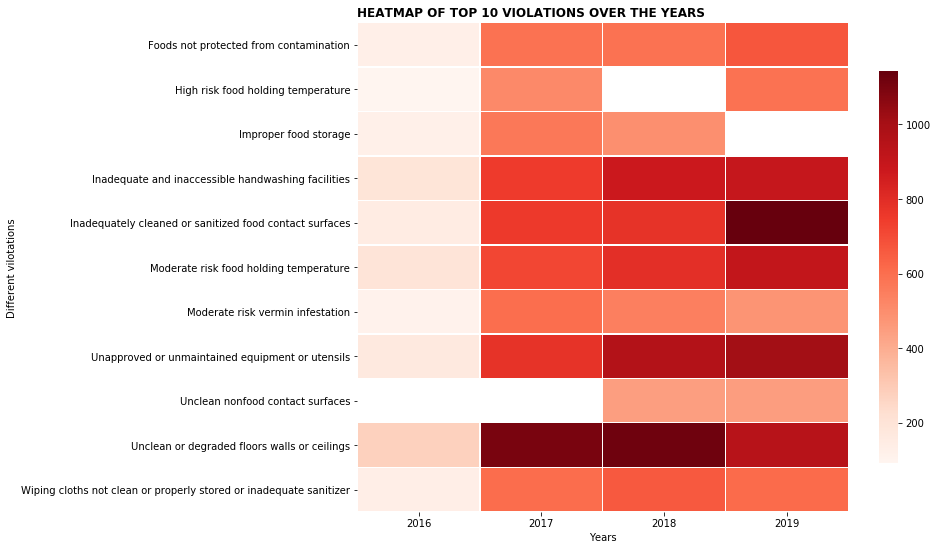

In [96]:
fig, ax_viol = plt.subplots(figsize=(11, 9))
sns.heatmap(top_10_viol_pivot,cmap="Reds", linewidth=0.3, cbar_kws={"shrink": .8})

# axis labels
plt.xlabel('Years')
plt.ylabel('Different vilotations')

# title
title = 'Heatmap of top 10 violations over the years'.upper()
plt.title(title, loc='left',fontweight='bold')

plt.show()

## C. Visualization risky cases and also of high risk cases per year : 

Text(0.5, 1.0, 'Movement of different risk cases over the years')

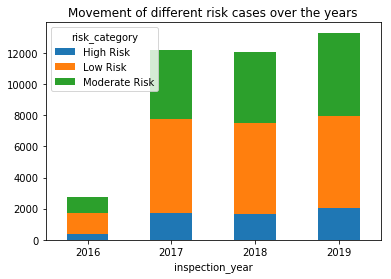

In [5]:
import matplotlib.pyplot as plt
risk_categ_df=df_full.groupby(['inspection_year','risk_category']).size().to_frame(name = 'Count').reset_index()
risk_categ_df

risk_categ_df.pivot_table(index='inspection_year', columns='risk_category', values='Count').plot.bar(rot=0, stacked=True)

plt.title("Movement of different risk cases over the years")

In [6]:
high_risk_df = df_full[df_full['risk_category']=='High Risk']
print("Total number of high risk cases : %d" %len(high_risk_df))

high_risk_count=high_risk_df.groupby('inspection_year').size().to_frame(name = 'Count').reset_index()
high_risk_count

Total number of high risk cases : 5825


,inspection_year,Count
0,2016,350
1,2017,1756
2,2018,1665
3,2019,2054


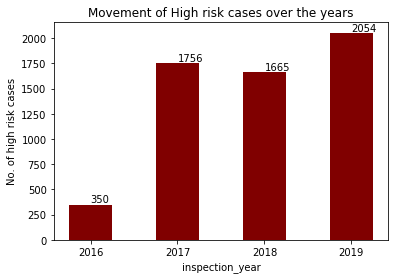

In [7]:
import matplotlib.pyplot as plt
import datetime
# high_risk_count['inspection_year']=pd.datetime(high_risk_count['inspection_year'])
barplot=plt.bar(high_risk_count['inspection_year'],high_risk_count['Count'], color ='maroon', align='center',width = 0.5)
plt.xlabel("inspection_year")
plt.ylabel("No. of high risk cases")
plt.title("Movement of High risk cases over the years")
xint=range(min(high_risk_count['inspection_year']),max(high_risk_count['inspection_year'])+1)
plt.xticks(xint)


for bar in barplot:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval, int(yval), va='bottom') #va: vertical alignment y positional argument
    
    
plt.show()



## C. General analysis to understand the inspection type : 

col_0                              count
inspection_type                         
Administrative or Document Review      4
Community Health Assessment            1
Complaint                           2399
Complaint Reinspection/Followup      232
Foodborne Illness Investigation      203
Multi-agency Investigation             3
New Construction                     999
New Ownership                       1914
New Ownership - Followup             531
Non-inspection site visit            847
Reinspection/Followup               6718
Routine - Scheduled                   74
Routine - Unscheduled              39638
Special Event                          8
Structural Inspection                402


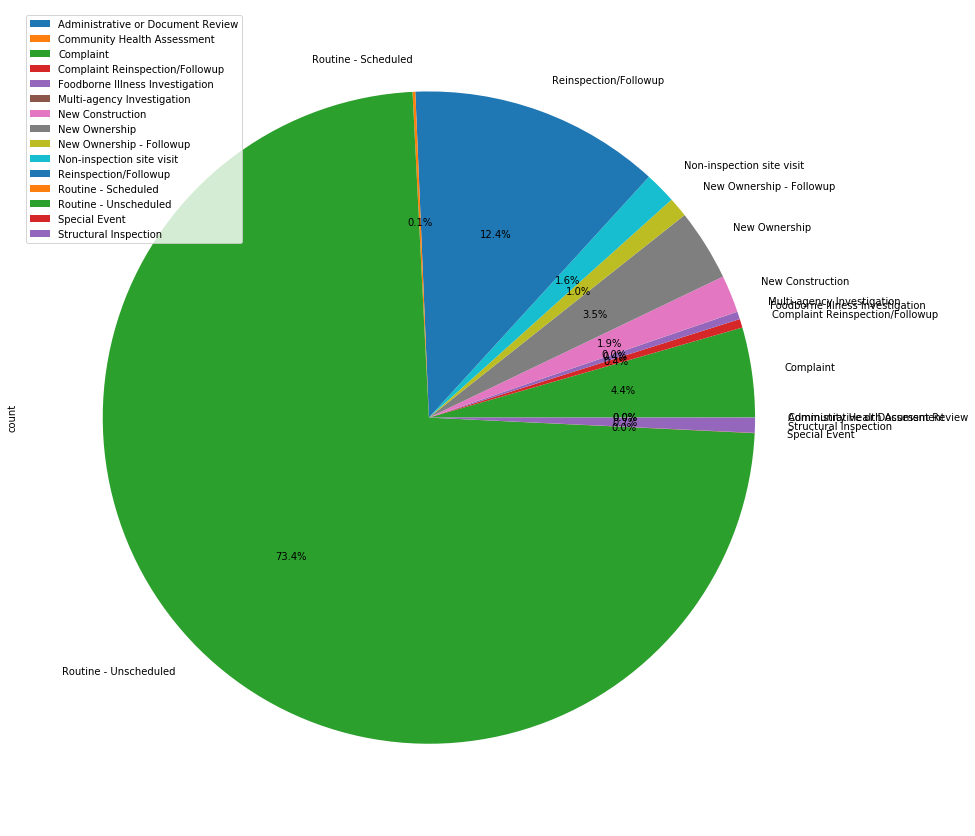

In [8]:
# Analysing inspection type  : 
cross_inspdtype_df=pd.crosstab(index=df_full['inspection_type'],columns='count')
print(cross_inspdtype_df)
cross_inspdtype_df.plot.pie(y='count', figsize=(15, 15),autopct='%1.1f%%')

## D. Geographic Heat map to understand most of the inspected areas in the state: 

In [9]:
from folium import plugins
from folium.plugins import HeatMap

dfzip_final_ca_NoNaN=df_full[(df_full['business_latitude'].notnull()) & (df_full['business_longitude'].notnull())]
len(dfzip_final_ca_NoNaN)

dfzip_final_ca_NoNaN['Name_of_Area'] = dfzip_final_ca_NoNaN['business_address'].str.replace('\d+', '')

In [29]:
location=dfzip_final_ca_NoNaN.groupby(['business_latitude','business_longitude','business_address']).size().reset_index(name='count').sort_values(by='count',ascending=False)
location=location[location['count']>5]
location['color']=location['count'].apply(lambda count:"Black" if count>=400 else
                                         "green" if count>=300 and count<400 else
                                         "Orange" if count>=200 and count<300 else
                                         "darkblue" if count>=150 and count<200 else
                                         "red" if count>=100 and count<150 else
                                         "lightblue" if count>=75 and count<100 else
                                         "brown" if count>=50 and count<75 else
                                         "grey")
location['size']=location['count'].apply(lambda count:12 if count>=400 else
                                         10 if count>=300 and count<400 else
                                         8 if count>=200 and count<300 else
                                         6 if count>=150 and count<200 else
                                         4 if count>=100 and count<150 else
                                         2 if count>=75 and count<100 else
                                         1 if count>=50 and count<75 else
                                         0.1)
location.head()


,business_latitude,business_longitude,business_address,count,color,size
267,37.737021,-122.390043,4508 03rd St,45,grey,0.1
2032,37.790324,-122.420664,1475 Polk St,43,grey,0.1
169,37.728497,-122.475639,3251 20th Ave,42,grey,0.1
966,37.768743,-122.427549,2020 MARKET St,42,grey,0.1
2663,37.808494,-122.412000,Pier 41,41,grey,0.1
1838,37.787691,-122.413717,720 Post St,41,grey,0.1
213,37.731902,-122.391576,5131 03rd St,41,grey,0.1
2198,37.794154,-122.404765,631 Kearny St,40,grey,0.1
426,37.748813,-122.421569,3601 26th St,39,grey,0.1
1526,37.783268,-122.410553,84 Turk St,39,grey,0.1


In [37]:
# convert to (n, 2) nd-array format for heatmap

heat_map=folium.Map([38.9, -77.05],zoom_start=11)

location_data = location[['business_latitude','business_longitude']].as_matrix()

# plot heatmap
heat_map.add_child(plugins.HeatMap(location_data, radius=15))
heat_map.save('heatmap.html')
heat_map

C:\Users\KINSUK\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """


## E. Heatmap analysis between postal codes vs risk categories : 

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt

df_post_risk_pivot=df_full.groupby(['risk_category','business_postal_code']).size().to_frame(name = 'Count')
df_post_risk_pivot

Count
risk_category business_postal_code       
High Risk     64110                     1
              92672                     2
              94101                     4
              94102                   376
              94103                   605
              94104                   121
              94105                   289
              94107                   258
              94108                   221
              94109                   380
              94110                   670
              94111                   193
              94112                   262
              94114                   133
              94115                   239
              94116                    89
              94117                   121
              94118                   401
              94120                     1
              94121                   256
              94122                   249
              94123                   118
              94124                   158
              94127                    52
              94130                     1
              94131                    34
              94132                    58
              94133                   242
              94134                   144
              94143                     2
...                                   ...
Moderate Risk 94115                   603
              94116                   270
              94117                   349
              94117-3504                2
              94118                   752
              94120                     2
              94121                   557
              94122                   658
              94123                   332
              94123-3106                1
              94124                   426
              94124-1917                2
              94127                   169
              94130                    11
              94131                   133
              94132                   262
              94133                   887
              94134                   290
              94143                     9
              94158                    59
              94301                     1
              94544                     1
              94901                     2
              95112                     2
              95117                     2
              95122                     3
              95132                     1
              95133                     2
              CA                        1
              Ca                        5

[136 rows x 1 columns]

In [76]:
df_m = df_post_risk_pivot.unstack(level=0)
df_m.head()

Count                       
risk_category        High Risk Low Risk Moderate Risk
business_postal_code                                 
64110                      1.0      2.0           1.0
92672                      2.0      3.0           3.0
94101                      4.0     16.0           8.0
94102                    376.0   1334.0         976.0
94103                    605.0   1465.0        1470.0

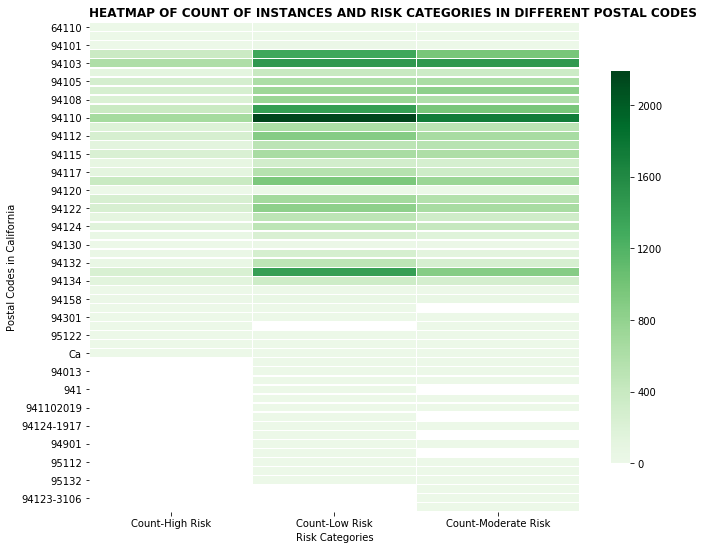

In [75]:
fig, ax = plt.subplots(figsize=(11, 9))
sns.heatmap(df_m,cmap="Greens", center=1000,linewidth=0.3, cbar_kws={"shrink": .8})

# axis labels
plt.xlabel('Risk Categories')
plt.ylabel('Postal Codes in California')

# title
title = 'Heatmap of count of instances and risk categories in different postal codes '.upper()
plt.title(title, loc='left',fontweight='bold')

plt.show()